In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("master-loan-approval-data.csv")

In [3]:
df.head()

,Age,Employment_Type,Annual_Income,Credit_Score,Loan_Amount,Loan_Term_Months,Loan_Purpose,Debt_to_Income_Ratio,Loan_Status
0,50,Salaried,110000,780,35000,72,Debt_Consolidation,0.22,Approved
1,27,Self-Employed,35000,560,20000,48,Debt_Consolidation,0.62,Denied
2,51,Self-Employed,210000,810,80000,120,Business,0.25,Approved
3,20,Student,8000,570,5000,24,Education,0.45,Denied
4,38,Salaried,92000,710,22000,48,Debt_Consolidation,0.29,Approved


In [4]:
df.shape

(3422, 9)

In [5]:
df.isna().sum()

Age                     0
Employment_Type         0
Annual_Income           0
Credit_Score            0
Loan_Amount             0
Loan_Term_Months        0
Loan_Purpose            0
Debt_to_Income_Ratio    0
Loan_Status             0
dtype: int64

In [6]:
df.duplicated().sum()

72

In [7]:
df = df.drop_duplicates()
print("\nShape after dropping duplicates:", df.shape)


Shape after dropping duplicates: (3350, 9)


In [8]:
target = "Loan_Status"

counts = df[target].value_counts()
perc = df[target].value_counts(normalize=True).mul(100).round(2)

print("Class counts:\n", counts)
print("\nClass percentage:\n", perc)


Class counts:
 Loan_Status
Approved    2002
Denied      1348
Name: count, dtype: int64

Class percentage:
 Loan_Status
Approved    59.76
Denied      40.24
Name: proportion, dtype: float64


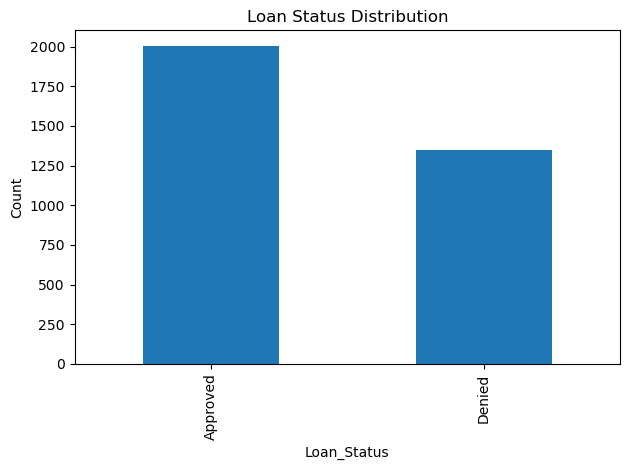

In [9]:
ax = counts.plot(kind="bar")
ax.set_title("Loan Status Distribution")
ax.set_xlabel("Loan_Status")
ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

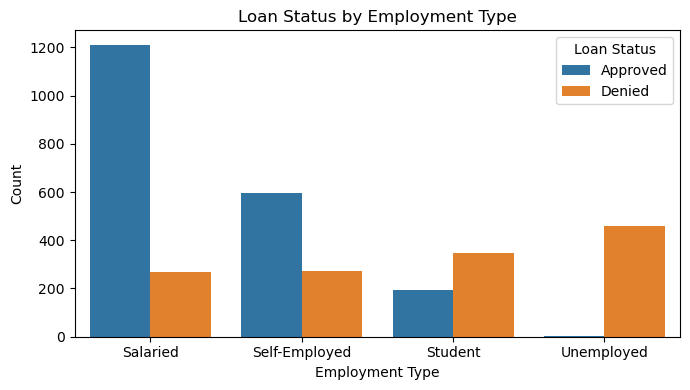

In [10]:
plt.figure(figsize=(7,4))
ax = sns.countplot(data=df, x="Employment_Type", hue="Loan_Status")
ax.set_title("Loan Status by Employment Type")
ax.set_xlabel("Employment Type")
ax.set_ylabel("Count")
plt.legend(title="Loan Status")
plt.tight_layout()
plt.show()

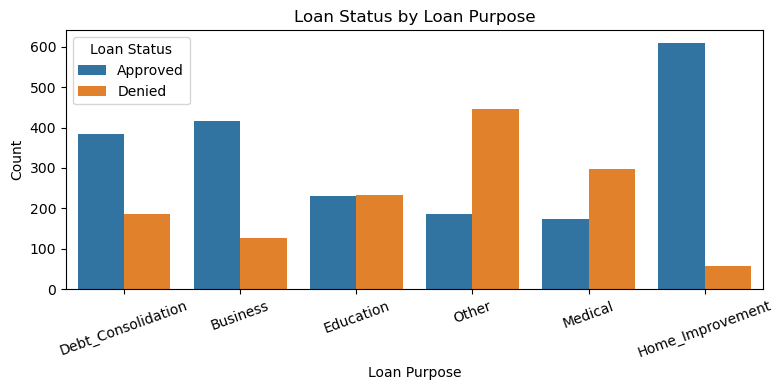

In [11]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data=df, x="Loan_Purpose", hue="Loan_Status")
ax.set_title("Loan Status by Loan Purpose")
ax.set_xlabel("Loan Purpose")
ax.set_ylabel("Count")
plt.legend(title="Loan Status")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


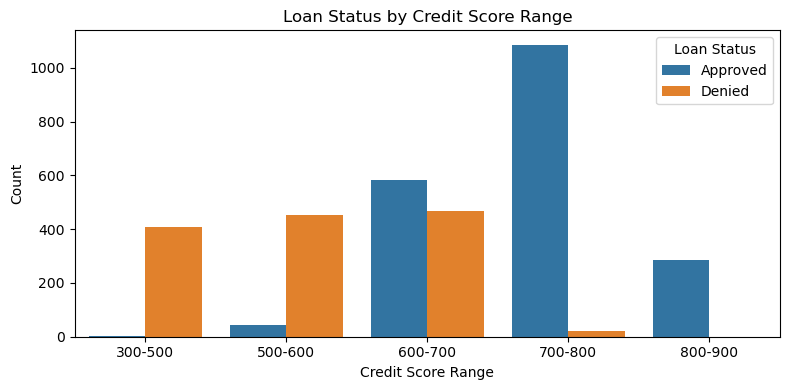

In [12]:
tmp = df.copy()
tmp["Credit_Score_Bin"] = pd.cut(
    tmp["Credit_Score"],
    bins=[300, 500, 600, 700, 800, 900],
    labels=["300-500", "500-600", "600-700", "700-800", "800-900"],
    include_lowest=True
)
plt.figure(figsize=(8,4))
sns.countplot(data=tmp, x="Credit_Score_Bin", hue=target)
plt.title("Loan Status by Credit Score Range")
plt.xlabel("Credit Score Range")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.tight_layout()
plt.show()

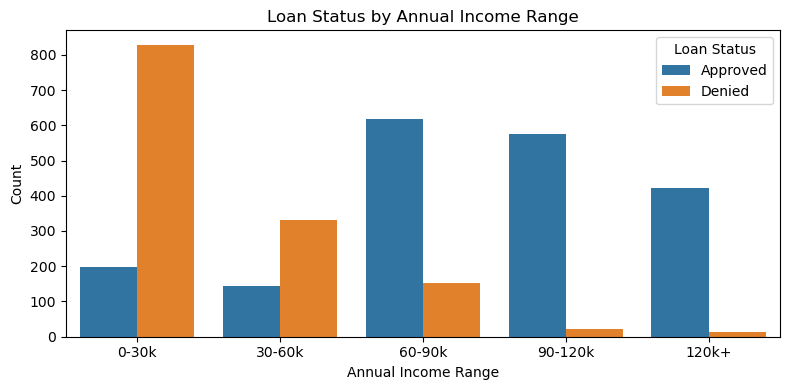

In [13]:
tmp2 = df.copy()
tmp2["Income_Bin"] = pd.cut(
    tmp2["Annual_Income"],
    bins=[0, 30000, 60000, 90000, 120000, 200000],
    labels=["0-30k", "30-60k", "60-90k", "90-120k", "120k+"],
    include_lowest=True
)
plt.figure(figsize=(8,4))
sns.countplot(data=tmp2, x="Income_Bin", hue=target)
plt.title("Loan Status by Annual Income Range")
plt.xlabel("Annual Income Range")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.tight_layout()
plt.show()

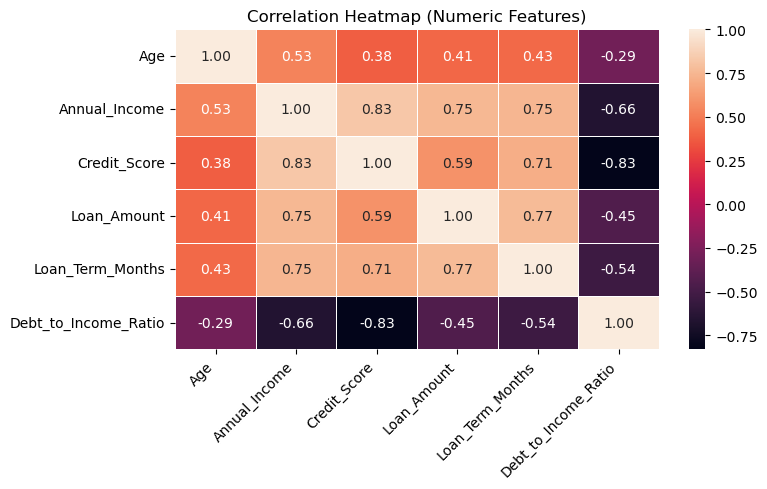

In [14]:
import numpy as np
num_cols = df.select_dtypes(include=[np.number]).columns
corr = df[num_cols].corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features)")
plt.xticks(rotation=45, ha="right") 
plt.tight_layout()
plt.show()

In [15]:
target_col = "Loan_Status"
X = df.drop(columns=[target_col])
y = df[target_col]

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Target classes:", y.unique())

X shape: (3350, 8)
y shape: (3350,)
Target classes: ['Approved' 'Denied']


In [16]:
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric columns (count):", len(numeric_features))
print(numeric_features)

print("\nCategorical columns (count):", len(categorical_features))
print(categorical_features)


Numeric columns (count): 6
['Age', 'Annual_Income', 'Credit_Score', 'Loan_Amount', 'Loan_Term_Months', 'Debt_to_Income_Ratio']

Categorical columns (count): 2
['Employment_Type', 'Loan_Purpose']


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes :", X_test.shape, y_test.shape)

print("\nTrain target distribution (%):")
print(y_train.value_counts(normalize=True).mul(100).round(2))

print("\nTest target distribution (%):")
print(y_test.value_counts(normalize=True).mul(100).round(2))


Train shapes: (2680, 8) (2680,)
Test shapes : (670, 8) (670,)

Train target distribution (%):
Loan_Status
Approved    59.78
Denied      40.22
Name: proportion, dtype: float64

Test target distribution (%):
Loan_Status
Approved    59.7
Denied      40.3
Name: proportion, dtype: float64


In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

print("Preprocessor ready ")


Preprocessor ready 


In [19]:
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,precision_recall_fscore_support, f1_score)

In [20]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average="macro")

    prec_w, rec_w, f1_w, _ = precision_recall_fscore_support(
        y_test, y_pred, average="weighted", zero_division=0
    )

    print(name)
    print("Accuracy:", round(acc, 4))
    print("Macro F1:", round(macro_f1, 4))
    print("Weighted Precision:", round(prec_w, 4))
    print("Weighted Recall:", round(rec_w, 4))
    print("Weighted F1:", round(f1_w, 4))

    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))

    return {
        "Model": name,
        "Accuracy": round(acc, 4),
        "Macro F1": round(macro_f1, 4),
        "Weighted F1": round(f1_w, 4)
    }


In [21]:
from sklearn.linear_model import LogisticRegression
log_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=2000))
])

log_model.fit(X_train, y_train)
print("Logistic Regression trained ")
log_model.named_steps["model"]

Logistic Regression trained 


LogisticRegression(max_iter=2000)

In [22]:
log_row = evaluate_model("Logistic Regression", log_model, X_test, y_test)
log_row

Logistic Regression
Accuracy: 0.9284
Macro F1: 0.925
Weighted Precision: 0.9284
Weighted Recall: 0.9284
Weighted F1: 0.9281

Classification Report:

              precision    recall  f1-score   support

    Approved       0.93      0.95      0.94       400
      Denied       0.93      0.89      0.91       270

    accuracy                           0.93       670
   macro avg       0.93      0.92      0.92       670
weighted avg       0.93      0.93      0.93       670



{'Model': 'Logistic Regression',
 'Accuracy': 0.9284,
 'Macro F1': 0.925,
 'Weighted F1': 0.9281}

In [23]:
y_pred_lr = log_model.predict(X_test)
labels = ["Denied", "Approved"]
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=labels)
cm_lr

array([[240,  30],
       [ 18, 382]], dtype=int64)

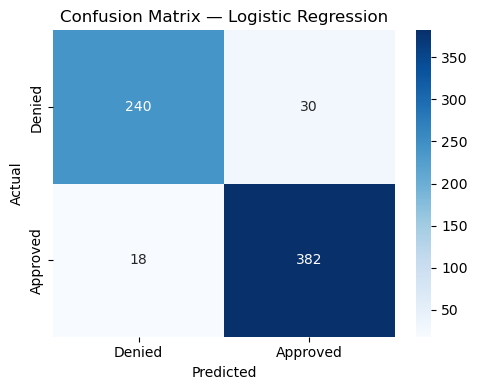

In [24]:
plt.figure(figsize=(5, 4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix — Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", DecisionTreeClassifier(random_state=42))
])

dt_model.fit(X_train, y_train);

print("Decision Tree trained ")
dt_model.named_steps["model"]

Decision Tree trained 


DecisionTreeClassifier(random_state=42)

In [27]:
dt_row = evaluate_model("Decision Tree", dt_model, X_test, y_test)
dt_row

Decision Tree
Accuracy: 0.9194
Macro F1: 0.9158
Weighted Precision: 0.9193
Weighted Recall: 0.9194
Weighted F1: 0.9192

Classification Report:

              precision    recall  f1-score   support

    Approved       0.92      0.94      0.93       400
      Denied       0.91      0.89      0.90       270

    accuracy                           0.92       670
   macro avg       0.92      0.91      0.92       670
weighted avg       0.92      0.92      0.92       670



{'Model': 'Decision Tree',
 'Accuracy': 0.9194,
 'Macro F1': 0.9158,
 'Weighted F1': 0.9192}

In [28]:
y_pred_dt = dt_model.predict(X_test)
labels = ["Denied", "Approved"]
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=labels)
cm_dt

array([[239,  31],
       [ 23, 377]], dtype=int64)

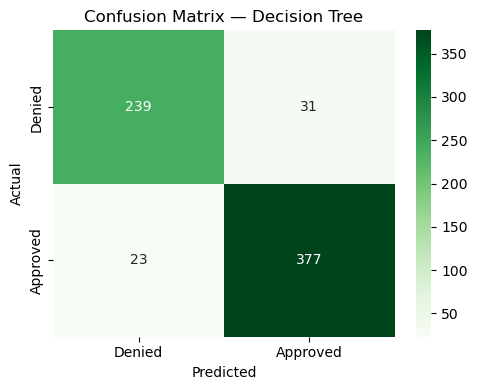

In [29]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens",
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix — Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train);

print("Random Forest trained ")
rf_model.named_steps["model"]

Random Forest trained 


RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

In [32]:
rf_row = evaluate_model("Random Forest", rf_model, X_test, y_test)
rf_row

Random Forest
Accuracy: 0.9358
Macro F1: 0.9332
Weighted Precision: 0.9357
Weighted Recall: 0.9358
Weighted F1: 0.9358

Classification Report:

              precision    recall  f1-score   support

    Approved       0.94      0.95      0.95       400
      Denied       0.93      0.91      0.92       270

    accuracy                           0.94       670
   macro avg       0.93      0.93      0.93       670
weighted avg       0.94      0.94      0.94       670



{'Model': 'Random Forest',
 'Accuracy': 0.9358,
 'Macro F1': 0.9332,
 'Weighted F1': 0.9358}

In [33]:
y_pred_rf = rf_model.predict(X_test)

labels = ["Denied", "Approved"]
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=labels)
cm_rf

array([[247,  23],
       [ 20, 380]], dtype=int64)

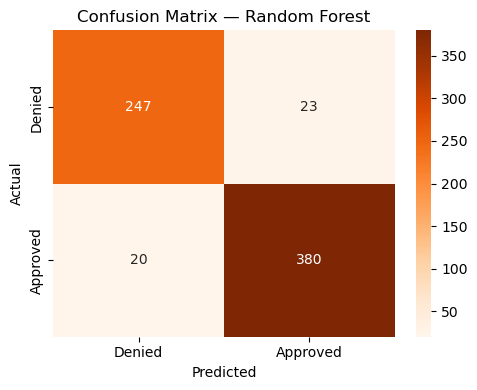

In [34]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Oranges",
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix — Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [35]:
from sklearn.metrics import precision_recall_fscore_support

def metrics_row(name, y_true, y_hat):
    acc = accuracy_score(y_true, y_hat)
    prec, rec, f1, _ = precision_recall_fscore_support(
        y_true, y_hat, average="weighted", zero_division=0
    )
    return {
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision (weighted)": round(prec, 4),
        "Recall (weighted)": round(rec, 4),
        "F1 (weighted)": round(f1, 4),
    }


In [36]:
log_pred = log_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

In [37]:
import pandas as pd

results = pd.DataFrame([
    metrics_row("Logistic Regression (Baseline)", y_test, log_pred),
    metrics_row("Decision Tree (Untuned)", y_test, dt_pred),
    metrics_row("Random Forest (Untuned)", y_test, rf_pred),
]).sort_values(by="F1 (weighted)", ascending=False).reset_index(drop=True)

display(results)

,Model,Accuracy,Precision (weighted),Recall (weighted),F1 (weighted)
0,Random Forest (Untuned),0.9358,0.9357,0.9358,0.9358
1,Logistic Regression (Baseline),0.9284,0.9284,0.9284,0.9281
2,Decision Tree (Untuned),0.9194,0.9193,0.9194,0.9192


In [38]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("CV ready (5-fold StratifiedKFold)")

CV ready (5-fold StratifiedKFold)


In [39]:
dt_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", DecisionTreeClassifier(random_state=42))
])

dt_param_grid = {
    "model__max_depth": [None, 3, 5, 8, 12],
    "model__min_samples_split": [2, 5, 10, 20],
    "model__min_samples_leaf": [1, 2, 5, 10],
    "model__criterion": ["gini", "entropy"]
}

best_dt_score = -1
best_dt_params = None

for max_depth in dt_param_grid["model__max_depth"]:
    for min_split in dt_param_grid["model__min_samples_split"]:
        for min_leaf in dt_param_grid["model__min_samples_leaf"]:
            for crit in dt_param_grid["model__criterion"]:

                dt_pipe.set_params(
                    model__max_depth=max_depth,
                    model__min_samples_split=min_split,
                    model__min_samples_leaf=min_leaf,
                    model__criterion=crit
                )

                scores = cross_val_score(
                    dt_pipe, X_train, y_train,
                    cv=cv, scoring="f1_weighted", n_jobs=-1
                )

                mean_score = scores.mean()

                if mean_score > best_dt_score:
                    best_dt_score = mean_score
                    best_dt_params = {
                        "model__max_depth": max_depth,
                        "model__min_samples_split": min_split,
                        "model__min_samples_leaf": min_leaf,
                        "model__criterion": crit
                    }

print("Best DT params:", best_dt_params)
print("Best DT CV F1 (weighted):", round(best_dt_score, 4))

Best DT params: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__min_samples_leaf': 5, 'model__criterion': 'gini'}
Best DT CV F1 (weighted): 0.9357


Tuned Decision Tree Accuracy: 0.9134

Tuned Decision Tree Classification Report:

              precision    recall  f1-score   support

    Approved       0.92      0.94      0.93       400
      Denied       0.90      0.88      0.89       270

    accuracy                           0.91       670
   macro avg       0.91      0.91      0.91       670
weighted avg       0.91      0.91      0.91       670



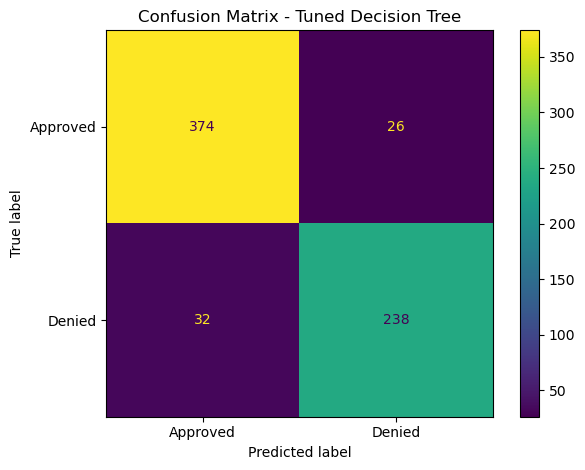

In [40]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

best_dt_model = dt_pipe.set_params(**best_dt_params)
best_dt_model.fit(X_train, y_train)

best_dt_pred = best_dt_model.predict(X_test)

print("Tuned Decision Tree Accuracy:", round(accuracy_score(y_test, best_dt_pred), 4))
print("\nTuned Decision Tree Classification Report:\n")
print(classification_report(y_test, best_dt_pred))

ConfusionMatrixDisplay.from_estimator(best_dt_model, X_test, y_test)
plt.title("Confusion Matrix - Tuned Decision Tree")
plt.tight_layout()
plt.show()

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(random_state=42, n_jobs=-1))
])

rf_param_grid = {
    "model__n_estimators": [200, 400],
    "model__max_depth": [None, 5, 10],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 5]
}

best_rf_score = -1
best_rf_params = None

for n_est in rf_param_grid["model__n_estimators"]:
    for max_depth in rf_param_grid["model__max_depth"]:
        for min_split in rf_param_grid["model__min_samples_split"]:
            for min_leaf in rf_param_grid["model__min_samples_leaf"]:

                rf_pipe.set_params(
                    model__n_estimators=n_est,
                    model__max_depth=max_depth,
                    model__min_samples_split=min_split,
                    model__min_samples_leaf=min_leaf
                )

                scores = cross_val_score(
                    rf_pipe, X_train, y_train,
                    cv=cv, scoring="f1_weighted", n_jobs=-1
                )

                mean_score = scores.mean()

                if mean_score > best_rf_score:
                    best_rf_score = mean_score
                    best_rf_params = {
                        "model__n_estimators": n_est,
                        "model__max_depth": max_depth,
                        "model__min_samples_split": min_split,
                        "model__min_samples_leaf": min_leaf
                    }

print("Best RF params:", best_rf_params)
print("Best RF CV F1 (weighted):", round(best_rf_score, 4))


Best RF params: {'model__n_estimators': 200, 'model__max_depth': None, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1}
Best RF CV F1 (weighted): 0.9496


Tuned Random Forest Accuracy: 0.9358

Tuned Random Forest Classification Report:

              precision    recall  f1-score   support

    Approved       0.94      0.95      0.95       400
      Denied       0.93      0.91      0.92       270

    accuracy                           0.94       670
   macro avg       0.93      0.93      0.93       670
weighted avg       0.94      0.94      0.94       670



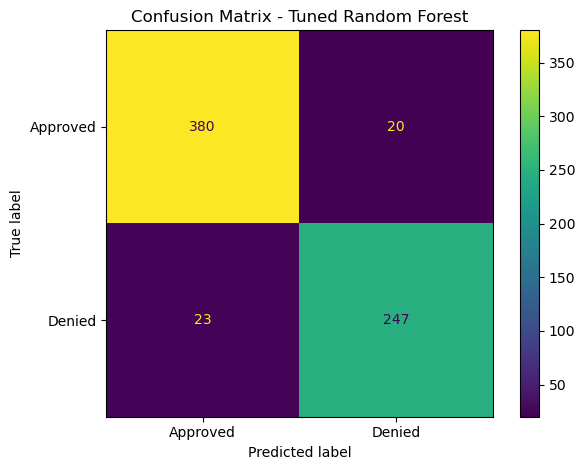

In [42]:
best_rf_model = rf_pipe.set_params(**best_rf_params)
best_rf_model.fit(X_train, y_train)

best_rf_pred = best_rf_model.predict(X_test)

print("Tuned Random Forest Accuracy:", round(accuracy_score(y_test, best_rf_pred), 4))
print("\nTuned Random Forest Classification Report:\n")
print(classification_report(y_test, best_rf_pred))

ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test, y_test)
plt.title("Confusion Matrix - Tuned Random Forest")
plt.tight_layout()
plt.show()

In [43]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def metrics_row(name, y_true, y_hat):
    acc = accuracy_score(y_true, y_hat)
    prec, rec, f1, _ = precision_recall_fscore_support(
        y_true, y_hat, average="weighted", zero_division=0
    )
    return {
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision (weighted)": round(prec, 4),
        "Recall (weighted)": round(rec, 4),
        "F1 (weighted)": round(f1, 4),
    }
rows = []
log_pred = log_model.predict(X_test)
rows.append(metrics_row("Logistic Regression (Baseline)", y_test, log_pred))

rows.append(metrics_row("Decision Tree (Untuned)", y_test, dt_pred))
rows.append(metrics_row("Random Forest (Untuned)", y_test, rf_pred))

rows.append(metrics_row("Decision Tree (Tuned)", y_test, best_dt_pred))
rows.append(metrics_row("Random Forest (Tuned)", y_test, best_rf_pred))

final_results = pd.DataFrame(rows).sort_values(by="F1 (weighted)", ascending=False).reset_index(drop=True)
display(final_results)


,Model,Accuracy,Precision (weighted),Recall (weighted),F1 (weighted)
0,Random Forest (Untuned),0.9358,0.9357,0.9358,0.9358
1,Random Forest (Tuned),0.9358,0.9357,0.9358,0.9358
2,Logistic Regression (Baseline),0.9284,0.9284,0.9284,0.9281
3,Decision Tree (Untuned),0.9194,0.9193,0.9194,0.9192
4,Decision Tree (Tuned),0.9134,0.9133,0.9134,0.9133


In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", KNeighborsClassifier(n_neighbors=5))
])

knn_model.fit(X_train, y_train);

print("KNN trained ")
knn_model.named_steps["model"]


KNN trained 


KNeighborsClassifier()

In [45]:
knn_row = evaluate_model("KNN (k=5)", knn_model, X_test, y_test)
knn_row

KNN (k=5)
Accuracy: 0.9358
Macro F1: 0.933
Weighted Precision: 0.9357
Weighted Recall: 0.9358
Weighted F1: 0.9357

Classification Report:

              precision    recall  f1-score   support

    Approved       0.94      0.95      0.95       400
      Denied       0.93      0.91      0.92       270

    accuracy                           0.94       670
   macro avg       0.94      0.93      0.93       670
weighted avg       0.94      0.94      0.94       670



{'Model': 'KNN (k=5)',
 'Accuracy': 0.9358,
 'Macro F1': 0.933,
 'Weighted F1': 0.9357}

In [46]:
knn_pred = knn_model.predict(X_test)

labels = ["Denied", "Approved"]
cm_knn = confusion_matrix(y_test, knn_pred, labels=labels)
cm_knn

array([[245,  25],
       [ 18, 382]], dtype=int64)

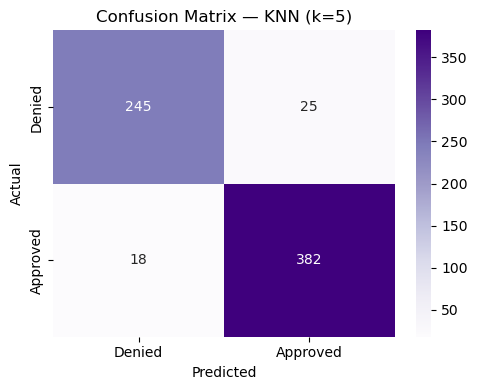

In [47]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Purples",
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix — KNN (k=5)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [48]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
def metrics_row(name, y_true, y_hat):
    acc = accuracy_score(y_true, y_hat)
    prec, rec, f1, _ = precision_recall_fscore_support(
        y_true, y_hat, average="weighted", zero_division=0
    )
    return {
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision (weighted)": round(prec, 4),
        "Recall (weighted)": round(rec, 4),
        "F1 (weighted)": round(f1, 4),
    }

log_pred = log_model.predict(X_test)

comparison = pd.DataFrame([
    metrics_row("Logistic Regression", y_test, log_pred),
    metrics_row("Decision Tree", y_test, dt_pred),
    metrics_row("Random Forest", y_test, rf_pred),
    metrics_row("KNN (k=5)", y_test, knn_pred),
]).sort_values(by="F1 (weighted)", ascending=False).reset_index(drop=True)

display(comparison)

,Model,Accuracy,Precision (weighted),Recall (weighted),F1 (weighted)
0,Random Forest,0.9358,0.9357,0.9358,0.9358
1,KNN (k=5),0.9358,0.9357,0.9358,0.9357
2,Logistic Regression,0.9284,0.9284,0.9284,0.9281
3,Decision Tree,0.9194,0.9193,0.9194,0.9192


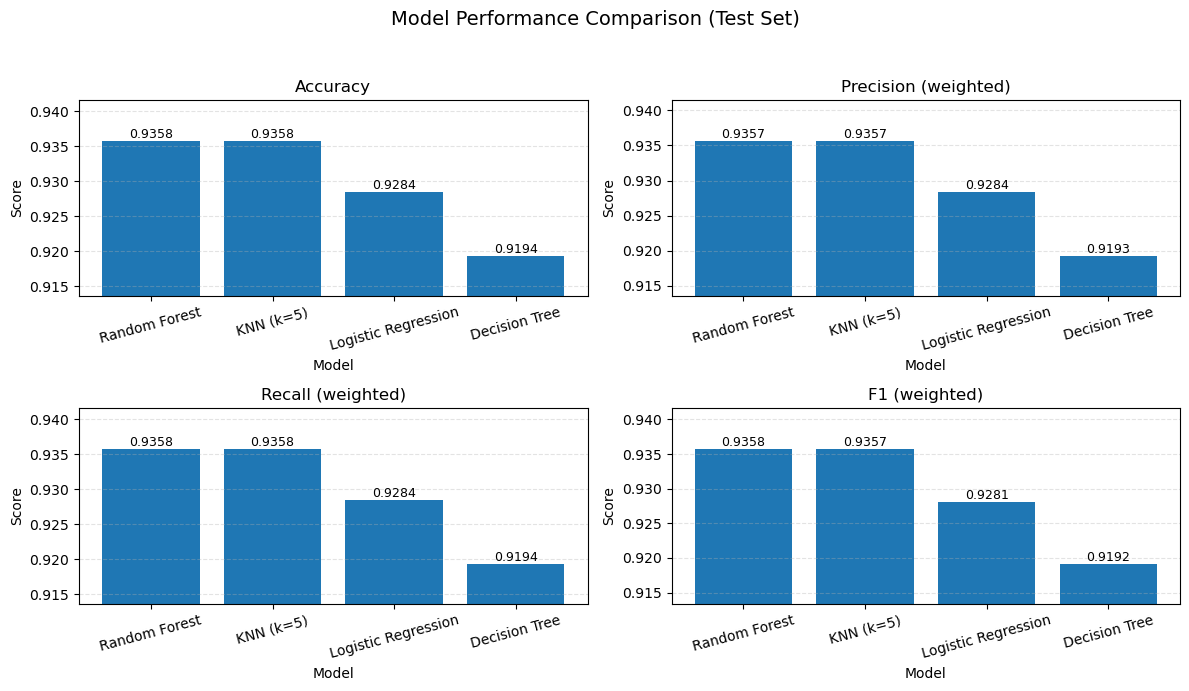

In [49]:
if "comparison" in globals() and isinstance(comparison, pd.DataFrame):
    perf = comparison.copy()
elif "final_results" in globals() and isinstance(final_results, pd.DataFrame):
    perf = final_results.copy()
else:
    raise NameError("Comparison table not found")

metrics = ["Accuracy", "Precision (weighted)", "Recall (weighted)", "F1 (weighted)"]

perf = perf.sort_values("F1 (weighted)", ascending=False).reset_index(drop=True)
models = perf["Model"].tolist()

fig, axes = plt.subplots(2, 2, figsize=(12, 7))
axes = axes.flatten()

for ax, m in zip(axes, metrics):
    vals = perf[m].astype(float).values
    
    mn, mx = float(vals.min()), float(vals.max())
    pad = max((mx - mn) * 0.35, 0.0015)
    ymin, ymax = mn - pad, mx + pad

    bars = ax.bar(models, vals)
    ax.set_title(m)
    ax.set_xlabel("Model")
    ax.set_ylabel("Score")
    ax.set_ylim(ymin, ymax)
    ax.tick_params(axis="x", rotation=15)
    ax.grid(axis="y", linestyle="--", alpha=0.35)

    for b, v in zip(bars, vals):
        ax.text(b.get_x() + b.get_width()/2, v, f"{v:.4f}",
                ha="center", va="bottom", fontsize=9)

fig.suptitle("Model Performance Comparison (Test Set)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [50]:
final_model = None

if "best_rf_model" in globals():
    final_model = best_rf_model
    final_name = "Tuned Random Forest"
elif "rf_model" in globals():
    final_model = rf_model
    final_name = "Random Forest"
else:
    final_model = log_model
    final_name = "Logistic Regression"

print("Final model selected:", final_name)


Final model selected: Tuned Random Forest


In [51]:
import pandas as pd

user_input = {
    "Age": 20,
    "Employment_Type": "Salaried",
    "Annual_Income": 50000,
    "Credit_Score": 620,
    "Loan_Amount": 200000,
    "Loan_Term_Months": 240,
    "Loan_Purpose": "Home",
    "Debt_to_Income_Ratio": 0.25
}

df = pd.DataFrame([user_input])

pred = final_model.predict(df)[0]
proba = final_model.predict_proba(df)[:, 1][0] if hasattr(final_model, "predict_proba") else None

label = "Approved" if pred in [1, "Approved", True] else "Rejected"
print("Prediction:", label)
if proba is not None:
    print("Probability:", round(proba, 4))

Prediction: Approved
Probability: 0.39
